In [2]:
import numpy as np
from scipy.stats import multinomial, norm, uniform, expon
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from genpen.utils import Paper
import vsketch
import shapely.geometry as sg
from shapely.geometry import box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString
import shapely.affinity as sa
import shapely.ops as so
from genpen import genpen as gp
import fn
from pathlib import Path
import itertools

%load_ext autoreload
%autoreload 2

In [ ]:



def generate_interpolation_dists(dist_gen):
    max_value = 0
    values = []
    while max_value < 1:
        delta = dist_gen.rvs()
        dist = max_value + delta
        if dist > 1:
            break
        values.append(dist)
        max_value = dist
    return np.array(values)

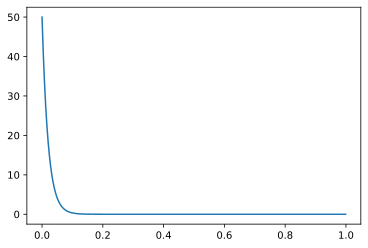

In [202]:
xrange = np.arange(0, 1, 0.001)
plt.plot(xrange, [dist_gen.pdf(x) for x in xrange])

In [228]:
dist_gen = expon(loc=0, scale=0.2)
gen_interpolation_dists(dist_gen)

array([0.20440828, 0.27992058, 0.29887754, 0.31779519, 0.42344833,
       0.54299197])

In [264]:
line = LineString([(0, 0), (100, 100)])

In [266]:
values = [0, 0.5,0.51, 1]

In [267]:
dashed = dash_linestring(line, values)

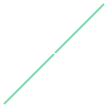

In [268]:
dashed

In [255]:
np.asarray(dashed.geoms[0].coords)

array([[ 32.7027058 , 325.56689171],
       [ 32.6769687 , 325.55203239]])

In [14]:
# make page
paper_size = '11x14 inches'
border:float=30
paper = Paper(paper_size)

drawbox = paper.get_drawbox(border)

In [300]:
# create background hatches
hatch0 = gp.HatchFill(poly_to_fill=drawbox, degrees=30, spacing=0.8)
hatch1 = gp.HatchFill(poly_to_fill=drawbox, degrees=90, spacing=0.3)
hatch2 = gp.HatchFill(poly_to_fill=drawbox, degrees=150, spacing=1.5)

hatches = [hatch0, hatch1, hatch2]

# create a triangle for masking
base_triangle = gp.RegPolygon(point=drawbox.centroid, radius=80, n_corners=3, rotation=180)
base_triangle = gp.center_at(base_triangle.poly, drawbox.centroid)

smaller_triangle = sa.scale(base_triangle, xfact=0.65, yfact=0.65, origin=base_triangle.centroid)
hollow_triangle = base_triangle.difference(smaller_triangle)
outer_corners = MultiPoint(base_triangle.boundary.coords)
inner_corners = MultiPoint(smaller_triangle.boundary.coords)
masks = []
for ii in range(3):
    pt_set = [
        outer_corners.geoms[ii],
        inner_corners.geoms[ii],
        inner_corners.geoms[ii+1],
        outer_corners.geoms[ii+1],
        outer_corners.geoms[ii]
        
    ]
    poly = Polygon(pt_set)
    masks.append(poly)
    
# masked_fills = []
# offset = -1
# for ii in range(3):
#     masked_fill = hatches[ii].fill.difference(masks[ii+offset])
#     # masked_fill = masked_fill.difference(masks[ii-1+offset])
#     masked_fills.append(masked_fill)
    
yet_smaller_triangle = sa.scale(base_triangle, xfact=0.25, yfact=0.25, origin=smaller_triangle.centroid)
hollow_triangle = smaller_triangle.difference(yet_smaller_triangle)
outer_corners = MultiPoint(smaller_triangle.boundary.coords)
inner_corners = MultiPoint(yet_smaller_triangle.boundary.coords)
smaller_masks = []
for ii in range(3):
    pt_set = [
        outer_corners.geoms[ii],
        inner_corners.geoms[ii],
        inner_corners.geoms[ii+1],
        outer_corners.geoms[ii+1],
        outer_corners.geoms[ii]
        
    ]
    poly = Polygon(pt_set)
    smaller_masks.append(poly)
    
larger_triangle = sa.scale(base_triangle, xfact=1.25, yfact=1.25, origin=base_triangle.centroid)
    
masked_fills = []
offset = -1
for ii in range(3):
    masked_fill = hatches[ii].fill.difference(masks[ii+offset])
    masked_fill = masked_fill.difference(smaller_masks[ii+offset])
    masked_fill = masked_fill.difference(smaller_masks[ii-1+offset])
    masked_fill = masked_fill.difference(yet_smaller_triangle)
    masked_fill = masked_fill.intersection(larger_triangle)
    masked_fills.append(masked_fill)
    
merged_lines = gp.merge_LineStrings(masked_fills)

dist_gen = expon(loc=0, scale=0.02)
dashed_lines = [dash_linestring(line, generate_interpolation_dists(dist_gen)) for line in merged_lines]
mls = gp.merge_LineStrings(dashed_lines)

/home/naka/code/side/genpen/src/genpen/genpen.py:643: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  merged_mls += list(mls)
/home/naka/code/side/genpen/src/genpen/genpen.py:643: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  merged_mls += list(mls)
/tmp/ipykernel_76369/2913887979.py:68: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  dashed_lines = [dash_linestring(line, generate_interpolation_dists(dist_gen)) for line in merged_lines]


In [301]:


sk = vsketch.Vsketch()
sk.size(paper.page_format_mm)
sk.scale('1mm')
sk.penWidth('0.3mm')
sk.geometry(mls)
sk.display(color_mode='layer')

/home/naka/anaconda3/envs/genpen/lib/python3.8/site-packages/vsketch/vsketch.py:1021: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for ls in shape:


<?xml version="1.0" encoding="utf-8" ?>
 
 
 
 
 image/svg+xml 
 
 2023-01-30T19:13:14.234424 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

In [299]:
sk.vpype('splitall linemerge linesort')
plot_id = fn.new_plot_id()
savedir='/home/naka/art/plotter_svgs'
savepath = Path(savedir).joinpath(f'{plot_id}.svg').as_posix()
sk.save(savepath)

saved 20230130-190840_537959-c0289-eca1a0 to s3://algorithmic-ink/current_plot_id
